## FAKE NEWS DETECTION




**Importing the Libraries**


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read the dataset

In [22]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [23]:
df_fake.shape

(23481, 4)

In [24]:
df_true.shape

(21417, 4)

**Data Cleaning and Preparation**

In [25]:
# Add flag to track fake and real
df_fake['target'] = 'fake'
df_true['target'] = 'true'

In [26]:
# Concatenate dataframes
data = pd.concat([df_fake, df_true]).reset_index(drop = True)
data.shape

(44898, 5)

In [27]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [28]:
# Check the data
data.head()

,title,text,subject,date,target
0,Hedge fund founder Scaramucci to join Trump's ...,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",politicsNews,"January 13, 2017",true
1,Texas Diner Owner ANNIHILATED Over Horribly R...,Anyone with half a brain knows that foods like...,News,"January 18, 2017",fake
2,BREAKING DALLAS: DPD Chief Confirms 10 Officer...,UPDATE 12:09: 1 Suspect in custody. 1 suspect ...,left-news,"Jul 7, 2016",fake
3,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,worldnews,"October 4, 2017",true
4,"Have the US, Trump Really Abandoned ‘Regime Ch...","Member of the US-backed Free Syrian Army, Ale...",Middle-east,"July 24, 2017",fake


In [29]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Hedge fund founder Scaramucci to join Trump's ...,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",politicsNews,true
1,Texas Diner Owner ANNIHILATED Over Horribly R...,Anyone with half a brain knows that foods like...,News,fake
2,BREAKING DALLAS: DPD Chief Confirms 10 Officer...,UPDATE 12:09: 1 Suspect in custody. 1 suspect ...,left-news,fake
3,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,worldnews,true
4,"Have the US, Trump Really Abandoned ‘Regime Ch...","Member of the US-backed Free Syrian Army, Ale...",Middle-east,fake


In [30]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",politicsNews,true
1,Anyone with half a brain knows that foods like...,News,fake
2,UPDATE 12:09: 1 Suspect in custody. 1 suspect ...,left-news,fake
3,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,worldnews,true
4,"Member of the US-backed Free Syrian Army, Ale...",Middle-east,fake


In [31]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"new york (reuters) - anthony scaramucci, a hed...",politicsNews,true
1,anyone with half a brain knows that foods like...,News,fake
2,update 12:09: 1 suspect in custody. 1 suspect ...,left-news,fake
3,amsterdam/united nations (reuters) - an inquir...,worldnews,true
4,"member of the us-backed free syrian army, ale...",Middle-east,fake


In [32]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [33]:
# Check
data.head()

,text,subject,target
0,new york reuters anthony scaramucci a hedge f...,politicsNews,true
1,anyone with half a brain knows that foods like...,News,fake
2,update 1209 1 suspect in custody 1 suspect pin...,left-news,fake
3,amsterdamunited nations reuters an inquiry by...,worldnews,true
4,member of the usbacked free syrian army alepp...,Middle-east,fake


In [34]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
data.head()

,text,subject,target
0,new york reuters anthony scaramucci hedge fund...,politicsNews,true
1,anyone half brain knows foods like fried chick...,News,fake
2,update 1209 1 suspect custody 1 suspect pinned...,left-news,fake
3,amsterdamunited nations reuters inquiry global...,worldnews,true
4,member usbacked free syrian army aleppo syria ...,Middle-east,fake


# Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


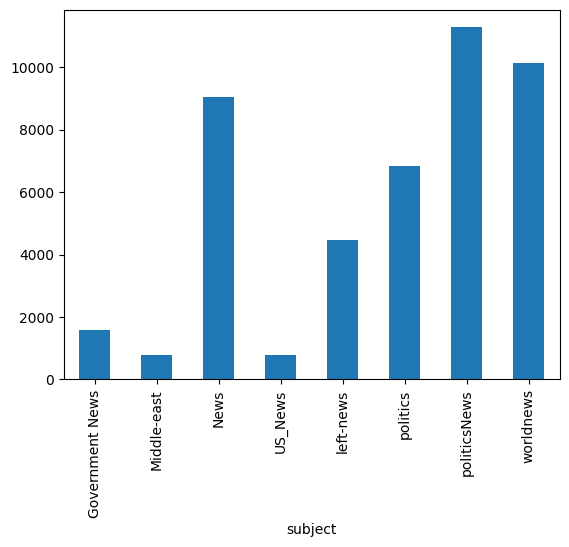

In [36]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


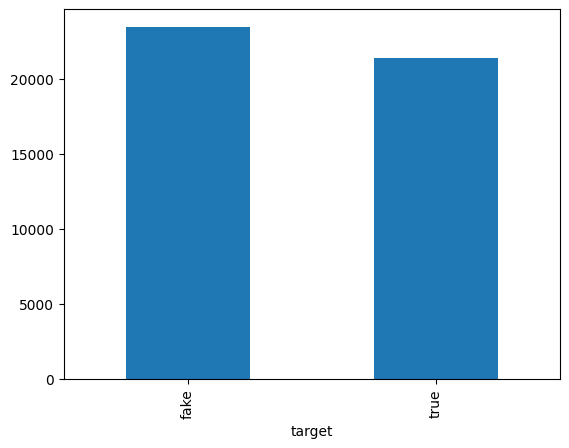

In [37]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

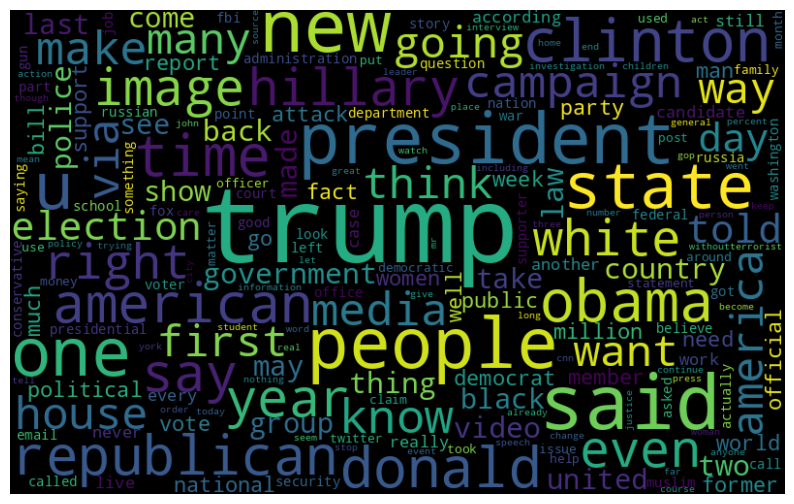

In [38]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


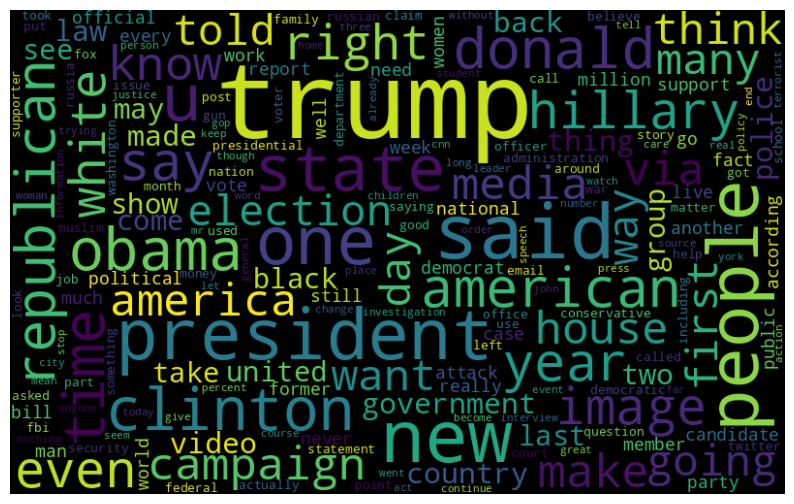

In [39]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

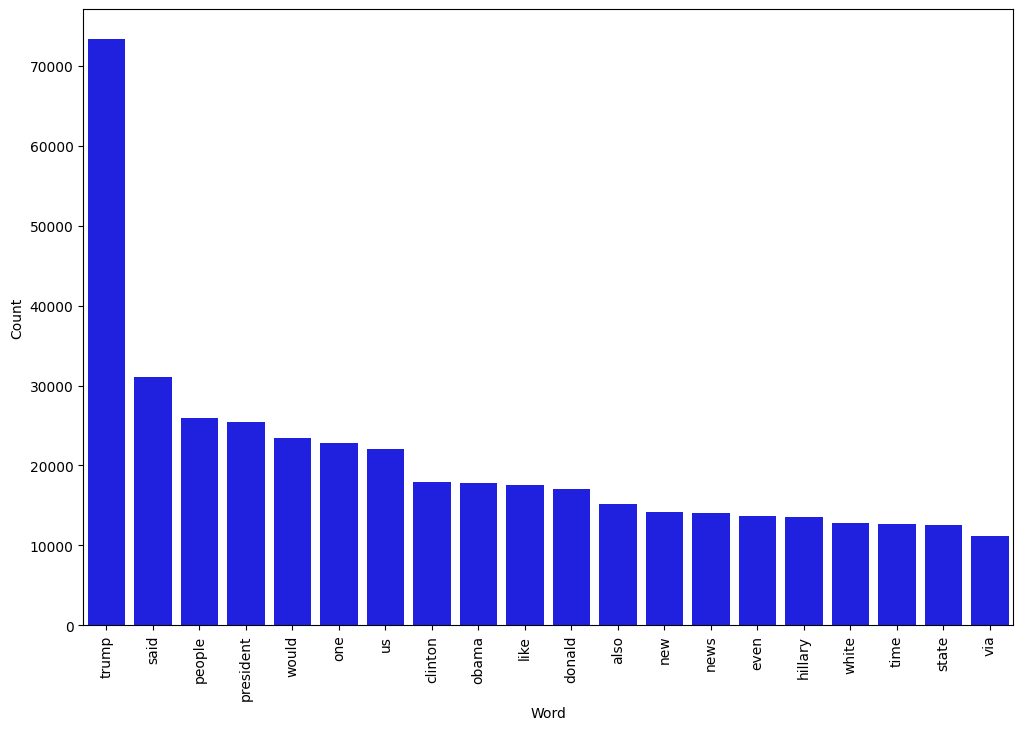

In [41]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

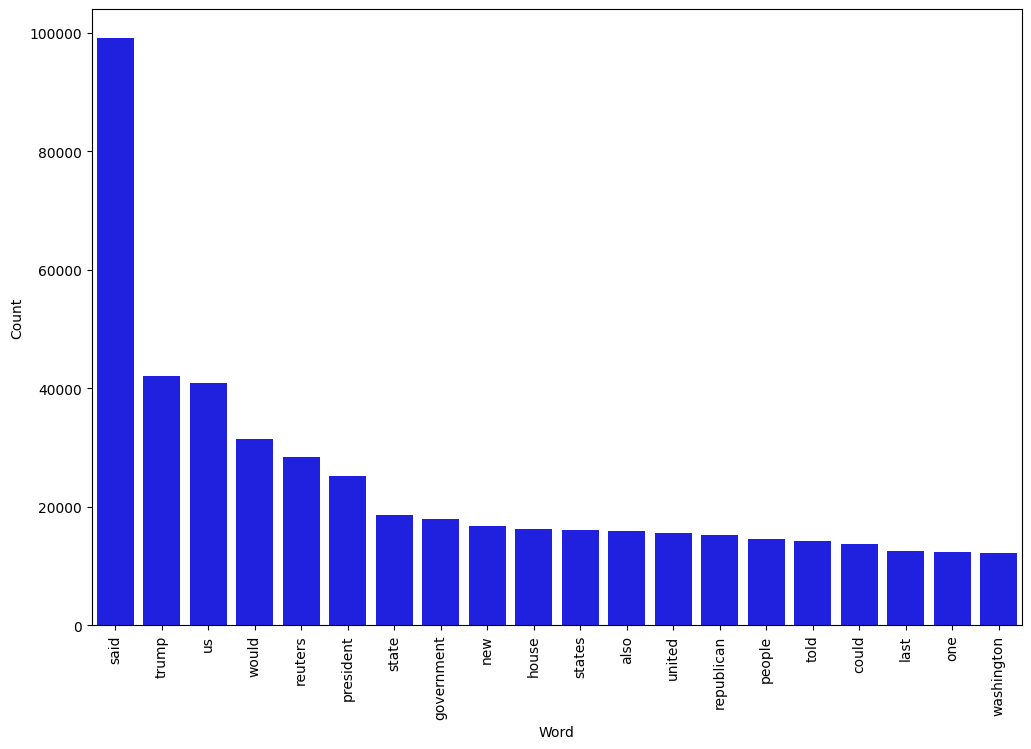

In [42]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [44]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Preparing Data

In [45]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


## Naive Bayes

In [46]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.53%


Confusion matrix, without normalization


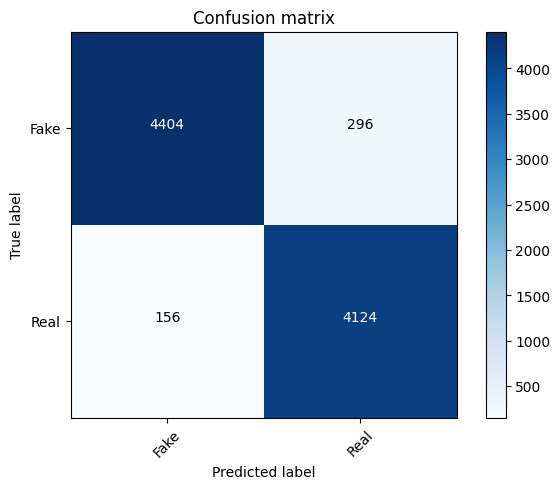

In [55]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [56]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.7%


Confusion matrix, without normalization


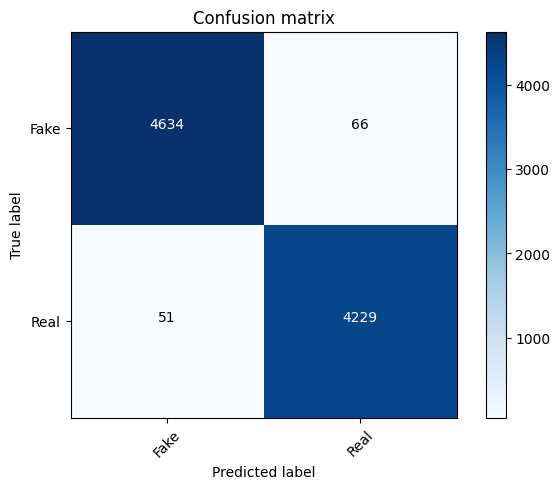

In [57]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.48%


Confusion matrix, without normalization


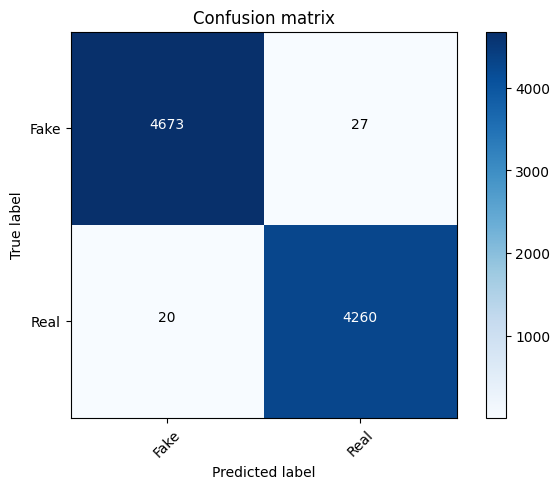

In [59]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.01%


Confusion matrix, without normalization


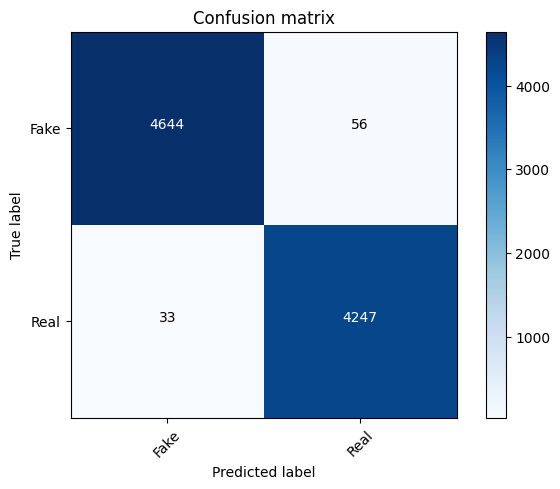

In [61]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

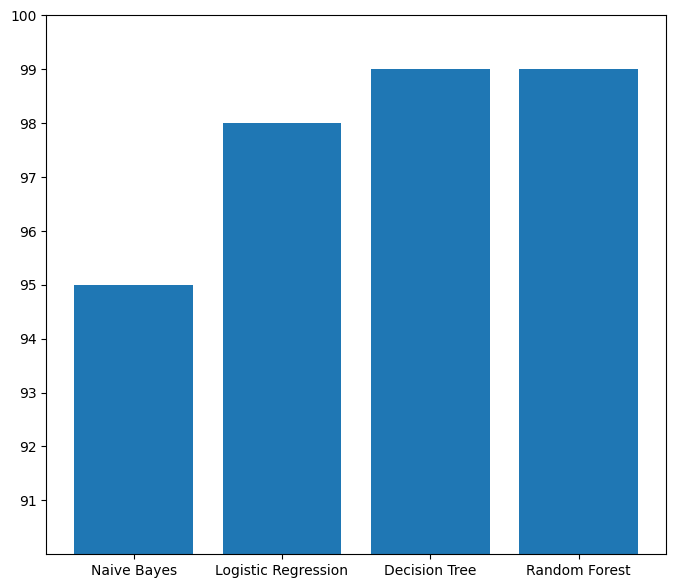

In [7]:
import matplotlib.pyplot as plt

# Define and initialize the 'dct' dictionary
dct = {'Naive Bayes': 95, 'Logistic Regression': 98, 'Decision Tree': 99, 'Random Forest': 99, }

plt.figure(figsize=(8, 7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.show()
